# Calcul snow mass pour les modèles aberrants

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [57]:
path_snowmass_EC_Earth3 = os.path.join("~/private-storage/output_data/interp_snowmass", "EC-Earth_snowmass_reprojete.nc")
path_snowmass_MPI_ESM1_2_LR = os.path.join("~/private-storage/output_data/interp_snowmass", "MPI-ESM1-2-LR_snowmass_reprojete.nc")
path_snowmass_MRI_ESM2_0 = os.path.join("~/private-storage/output_data/interp_snowmass", "MRI-ESM2-0_snowmass_reprojete.nc")

In [58]:
snow_mass_EC_Earth3 = xr.open_dataset(path_snowmass_EC_Earth3)
snow_mass_MPI_ESM1_2_LR = xr.open_dataset(path_snowmass_MPI_ESM1_2_LR)
snow_mass_MRI_ESM2_0 = xr.open_dataset(path_snowmass_MRI_ESM2_0)

## Calcul snowmass

### Modèle EC-Earth3

In [21]:
snow_mass_EC_Earth3_ref = snow_mass_EC_Earth3.sel(time=slice("1995", "2014"))
snow_mass_EC_Earth3_ref

<xarray.Dataset> Size: 62MB
Dimensions:  (time: 240, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 2kB 1995-01-16T12:00:00 ... 2014-12-16T12:...
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    snw      (time, lat, lon) float32 62MB ...
Attributes:
    regrid_method:  nearest_s2d

In [45]:
snowmass_EC = snow_mass_EC_Earth3_ref["snw"]
snowmass_EC = snowmass_EC.groupby("time.month").mean(dim="time")
snowmass_EC = snowmass_EC.sel(lat=snowmass_EC.lat>=20)

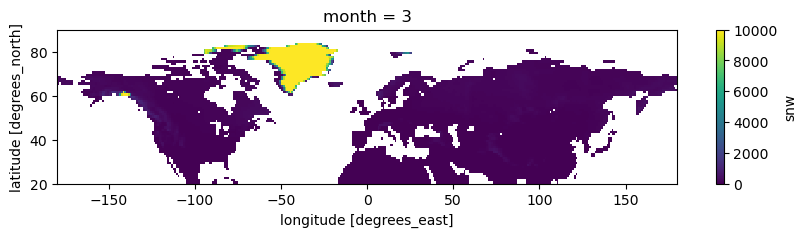

In [47]:
march_snowmass_EC = snowmass_EC.sel(month=3)

plt.figure(figsize=(10, 2))
march_snowmass_EC.plot()

In [49]:
path_areacella_EC = os.path.join("/home/jovyan/private-storage/areacella_recalcule_cdo_bis/", "EC-Earth3_gridarea_hist_recalcule.nc")

In [50]:
areacella_EC = xr.open_dataset(path_areacella_EC)
areacella_EC = areacella_EC["cell_area"]

In [54]:
snowmass_EC = (snowmass_EC * areacella_EC).sum(dim=["lat", "lon"], skipna=True)
snowmass_EC

<xarray.DataArray (month: 12)> Size: 96B
array([2.27681796e+16, 2.36445024e+16, 2.41570869e+16, 2.39254406e+16,
       2.26952026e+16, 2.05428734e+16, 1.93359942e+16, 1.91983439e+16,
       1.92524920e+16, 1.96601405e+16, 2.05036344e+16, 2.16177790e+16])
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

In [55]:
snowmass_gt_EC = snowmass_EC / 1e12
snowmass_gt_EC

<xarray.DataArray (month: 12)> Size: 96B
array([22768.17956193, 23644.50243979, 24157.0869147 , 23925.44055529,
       22695.20259273, 20542.87340868, 19335.99422944, 19198.3439384 ,
       19252.49198777, 19660.14045921, 20503.634421  , 21617.77895452])
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

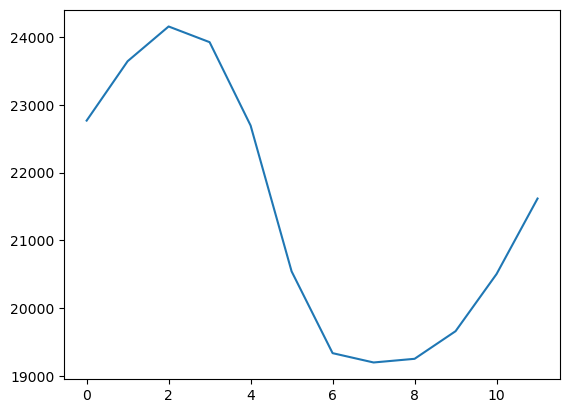

In [56]:
plt.plot(snowmass_gt_EC)

### Modèle MPI

In [24]:
snow_mass_MPI_ESM1_2_LR_ref = snow_mass_MPI_ESM1_2_LR.sel(time=slice("1995", "2014"))
snow_mass_MPI_ESM1_2_LR_ref

<xarray.Dataset> Size: 62MB
Dimensions:  (time: 240, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 2kB 1995-01-16T12:00:00 ... 2014-12-16T12:...
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    snw      (time, lat, lon) float32 62MB ...
Attributes:
    regrid_method:  nearest_s2d

In [39]:
snowmass_MPI = snow_mass_MPI_ESM1_2_LR_ref["snw"]
snowmass_MPI = snowmass_MPI.groupby("time.month").mean(dim="time")
snowmass_MPI = snowmass_MPI.sel(lat=snowmass_MPI.lat>=20)

In [40]:
snowmass_MPI

<xarray.DataArray 'snw' (month: 12, lat: 70, lon: 360)> Size: 1MB
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 560B 20.5 21.5 22.5 23.5 24.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

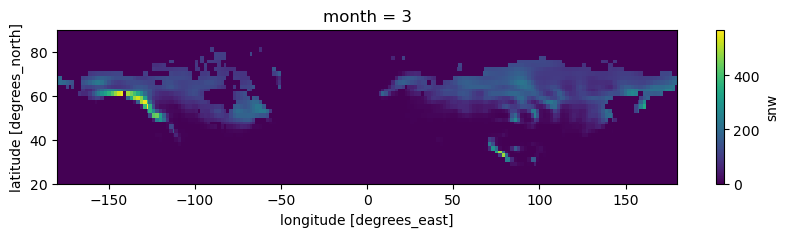

In [48]:
march_snowmass_MPI = snowmass_MPI.sel(month=3)

plt.figure(figsize=(10, 2))
march_snowmass_MPI.plot()

In [27]:
path_areacella_MPI = os.path.join("/home/jovyan/private-storage/areacella_recalcule_cdo_bis/", "MPI-ESM1-2-LR_gridarea_hist_recalcule.nc")

In [28]:
areacella_MPI = xr.open_dataset(path_areacella_MPI)
areacella_MPI = areacella_MPI["cell_area"]

In [29]:
areacella_MPI

<xarray.DataArray 'cell_area' (lat: 180, lon: 360)> Size: 518kB
[64800 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Attributes:
    standard_name:  area
    long_name:      area of grid cell
    units:          m2

In [51]:
snowmass_MPI = (snowmass_MPI * areacella_MPI).sum(dim=["lat", "lon"], skipna=True)
snowmass_MPI

<xarray.DataArray (month: 12)> Size: 96B
array([2.60427100e+15, 3.26699602e+15, 3.50699742e+15, 2.91162988e+15,
       1.13579403e+15, 2.82200938e+13, 4.87854530e+10, 6.75127407e+11,
       2.27825181e+13, 2.59578913e+14, 8.45498851e+14, 1.71673203e+15])
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

In [52]:
snowmass_gt_MPI = snowmass_MPI / 1e12
snowmass_gt_MPI

<xarray.DataArray (month: 12)> Size: 96B
array([2.60427100e+03, 3.26699602e+03, 3.50699742e+03, 2.91162988e+03,
       1.13579403e+03, 2.82200938e+01, 4.87854530e-02, 6.75127407e-01,
       2.27825181e+01, 2.59578913e+02, 8.45498851e+02, 1.71673203e+03])
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

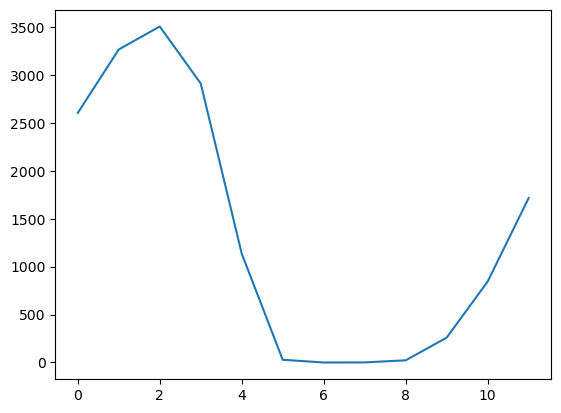

In [53]:
plt.plot(snowmass_gt_MPI)

### Modèle MRI

In [60]:
snow_mass_MRI_ref = snow_mass_MRI_ESM2_0.sel(time=slice("1995", "2014"))
snow_mass_MRI_ref

<xarray.Dataset> Size: 62MB
Dimensions:  (time: 240, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 2kB 1995-01-16T12:00:00 ... 2014-12-16T12:...
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    snw      (time, lat, lon) float32 62MB ...
Attributes:
    regrid_method:  nearest_s2d

In [61]:
snowmass_MRI = snow_mass_MRI_ref["snw"]
snowmass_MRI = snowmass_MRI.groupby("time.month").mean(dim="time")
snowmass_MRI = snowmass_MRI.sel(lat=snowmass_MRI.lat>=20)

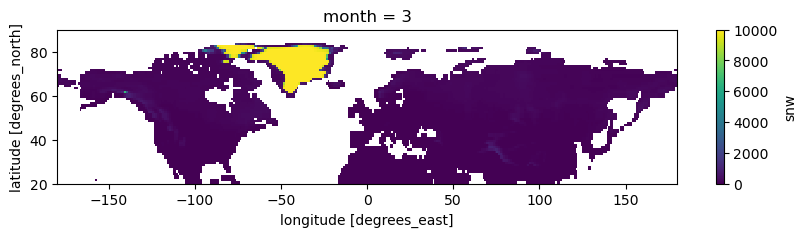

In [62]:
march_snowmass_MRI = snowmass_MRI.sel(month=3)

plt.figure(figsize=(10, 2))
march_snowmass_MRI.plot()

In [63]:
path_areacella_MRI = os.path.join("/home/jovyan/private-storage/areacella_recalcule_cdo_bis/", "MRI-ESM2-0_gridarea_hist_recalcule.nc")

In [64]:
areacella_MRI = xr.open_dataset(path_areacella_MRI)
areacella_MRI = areacella_MRI["cell_area"]

In [65]:
snowmass_MRI = (snowmass_MRI * areacella_MRI).sum(dim=["lat", "lon"], skipna=True)
snowmass_MRI

<xarray.DataArray (month: 12)> Size: 96B
array([2.32412648e+16, 2.42804829e+16, 2.49817040e+16, 2.48898422e+16,
       2.29833297e+16, 2.05970529e+16, 1.96836925e+16, 1.93666184e+16,
       1.93850267e+16, 1.97679499e+16, 2.06776979e+16, 2.18808696e+16])
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

In [66]:
snowmass_gt_MRI = snowmass_MRI / 1e12
snowmass_gt_MRI

<xarray.DataArray (month: 12)> Size: 96B
array([23241.26475439, 24280.48292797, 24981.70396498, 24889.84223046,
       22983.32970245, 20597.05292276, 19683.69254695, 19366.61839373,
       19385.02666736, 19767.94988403, 20677.69794133, 21880.86962198])
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

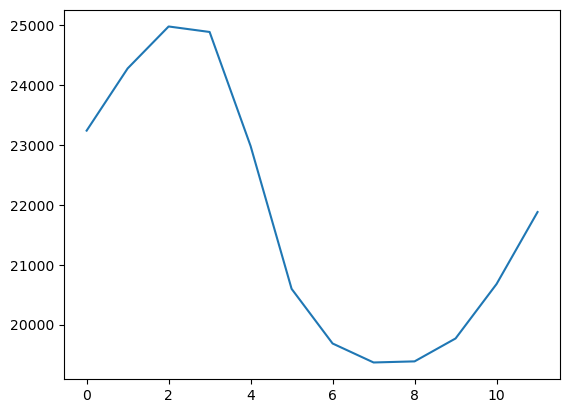

In [67]:
plt.plot(snowmass_gt_MRI)

In [35]:
def get_data(path_snw):
    ds_snw = xr.open_dataset(path_snw)
    #ds_area = xr.open_dataset(path_areacella)
    #ds_sftlf = xr.open_dataset(path_sftlf)
    return ds_snw

def extraction_variable_and_monthly_mean(ds_snw, variable="snw", start_year="1995", end_year="2014", lat_min=20):
    snw = ds_snw[variable].sel(time=slice(start_year, end_year))

    if lat_min is not None:
        snw = snw.sel(lat=snw.lat >= lat_min)

    snw = snw.where(snw < 1e19, float("nan"))

    #max_val = snw.max().item()
    #if max_val > 1.5:
        #print(f"La variable '{variable}' est en %. Conversion en fraction.")
        #snw = snw / 100

    #if sftlf is not None:
        #snw=snw.where(sftlf>0)

    #snw = snw.clip(0, 1)

    snowmass = snw.groupby("time.month").mean(dim="time")
    monthly_sum = snowmass.cumsum(dim=("lat", "lon"))

    return snw, snowmass, monthly_sum

In [36]:
path_snw = os.path.join("/home/jovyan/private-storage/data_snowmass/", "snw_merged_EC-Earth_1850-2014.nc")
#path_areacella = os.path.join("/home/jovyan/private-storage/areacella_recalcule_cdo_bis/", files.replace("hist_reprojete", "gridarea_hist_recalcule"))
#path_sftlf = os.path.join("/home/jovyan/private-storage/interp_sftlf_bis/", "EC-Earth3_sftlf_reprojete.nc")
                                 
ds_snw = get_data(path_snw)
#sftlf = ds_sftlf["sftlf"]
snw, snowmass, monthly_sum = extraction_variable_and_monthly_mean(ds_snw)
#areacella = ds_area["cell_area"]
#snow_cover_km2 = snow_surface_calculation(snow_cover, areacella)
#snow_cover_dict[model_name] = snow_cover_km2

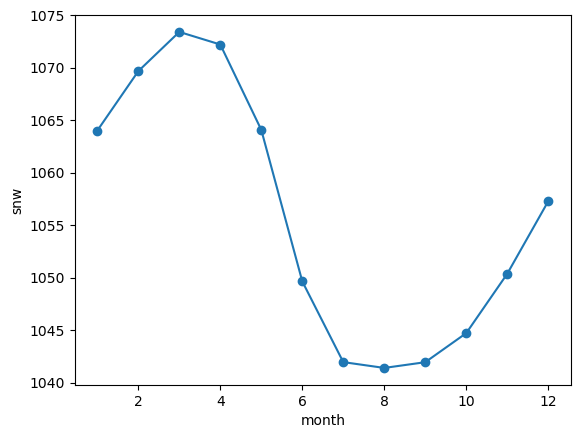

In [43]:
# Ponderation par cos(lat) pour respecter la surface réelle
weights = np.cos(np.deg2rad(snow_mass_EC_Earth3_ref.lat))
weights.name = "weights"

weighted_snw = snow_mass_EC_Earth3_ref.snw.weighted(weights)

# Moyenne spatiale pondérée pour chaque mois
monthly_weighted_mean = weighted_snw.mean(dim=["lat", "lon"]).groupby("time.month").mean()

# Tracer le résultat
monthly_weighted_mean.plot(marker='o')

In [44]:
monthly_weighted_mean

<xarray.DataArray 'snw' (month: 12)> Size: 96B
array([1064.01113101, 1069.67261364, 1073.40830856, 1072.20821526,
       1064.07814904, 1049.64667236, 1041.95585896, 1041.40301797,
       1041.94827618, 1044.71670276, 1050.37053103, 1057.27684986])
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

In [46]:
path_areacella = os.path.join("/home/jovyan/private-storage/areacella_recalcule_cdo_bis/", "EC-Earth3_gridarea_hist_recalcule.nc")

In [47]:
areacella = xr.open_dataset(path_areacella)

In [49]:
areacella = areacella["cell_area"]

In [67]:
monthly = snow_mass_EC_Earth3_ref["snw"].groupby("time.month")

In [68]:
snow_mass_monthly = (monthly * areacella).sum(dim=["lat", "lon"])

ValueError: incompatible dimensions for a grouped binary operation: the group variable 'month' is not a dimension on the other argument with dimensions ('lat', 'lon')

In [62]:
snow_mass_ans = snow_mass_monthly.groupby("month").mean()
snow_mass_gt = snow_mass_ans / 1e12

<DataArrayGroupBy, grouped over 1 grouper(s), 12 groups in total:
    'month': 12/12 groups present with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12>

In [59]:
snow_mass_gt

<xarray.DataArray (month: 12)> Size: 96B
array([542714.275644  , 545601.99679298, 547507.4420484 , 546895.31709412,
       542748.45916241, 535387.47563038, 531464.66495488, 531182.68040774,
       531460.79724683, 532872.87328912, 535756.69022011, 539279.35808524])
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

In [60]:
areacella

<xarray.DataArray 'cell_area' (lat: 180, lon: 360)> Size: 518kB
[64800 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Attributes:
    standard_name:  area
    long_name:      area of grid cell
    units:          m2